## Importación de Librerias

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
# the scaler - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sn
import seaborn as sb

## Carga del dataset

In [48]:
data = pd.read_csv("Training Data.csv")

data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Seleccion de Caracteristicas

In [49]:
X_inicial = data.iloc[:,1:12]
y_inicial = data.iloc[:,-1]

In [50]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
X_inicial['Married/Single'] = LabelEncoder.fit_transform(X_inicial['Married/Single'])
X_inicial['House_Ownership'] = LabelEncoder.fit_transform(X_inicial['House_Ownership'])
X_inicial['Car_Ownership'] = LabelEncoder.fit_transform(X_inicial['Car_Ownership'])
X_inicial['Profession'] = LabelEncoder.fit_transform(X_inicial['Profession'])
X_inicial['CITY'] = LabelEncoder.fit_transform(X_inicial['CITY'])
X_inicial['STATE'] = LabelEncoder.fit_transform(X_inicial['STATE'])

In [51]:
RF = RandomForestClassifier(max_depth=12, n_estimators=100)
df1 = pd.DataFrame()
RF.fit(X_inicial, y_inicial)
y_pred_RF= RF.predict(X_inicial)
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor",
        "Top 6 Feature Predictor",
        "Top 7 Feature Predictor",
        "Top 8 Feature Predictor",
        "Top 9 Feature Predictor",
        "Top 10 Feature Predictor",
        "Top 11 Feature Predictor"]

df1.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df1.loc['Train Accuracy', 'Details'] = RF.score(X_inicial, y_inicial) 

feature_importances = X_inicial.columns[np.argsort(RF.feature_importances_)][-11:]
df1.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[10]
df1.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[9]
df1.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[8]
df1.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[7]
df1.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[6]
df1.loc['Top 6 Feature Predictor', 'Details'] = feature_importances[5]
df1.loc['Top 7 Feature Predictor', 'Details'] = feature_importances[4]
df1.loc['Top 8 Feature Predictor', 'Details'] = feature_importances[3]
df1.loc['Top 9 Feature Predictor', 'Details'] = feature_importances[2]
df1.loc['Top 10 Feature Predictor', 'Details'] = feature_importances[1]
df1.loc['Top 11 Feature Predictor', 'Details'] = feature_importances[0]

display(df1)


,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.882048
Top 1 Feature Predictor,Income
Top 2 Feature Predictor,CITY
Top 3 Feature Predictor,Profession
Top 4 Feature Predictor,Age
Top 5 Feature Predictor,STATE
Top 6 Feature Predictor,Experience
Top 7 Feature Predictor,CURRENT_JOB_YRS
Top 8 Feature Predictor,CURRENT_HOUSE_YRS


## Se observa el dataset

In [60]:
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,196616,2421544,46,17,single,rented,no,Artist,Morena,Madhya_Pradesh,6,13,1
1,229446,4502034,30,16,single,rented,yes,Civil_engineer,Dindigul,Tamil_Nadu,7,12,0
2,109588,5139547,37,8,single,rented,no,Fashion_Designer,Rajpur_Sonarpur,West_Bengal,3,12,0
3,59628,7362151,65,4,single,rented,no,Magistrate,Gurgaon,Haryana,3,11,0
4,147498,1888040,43,2,married,rented,no,Official,Tiruvottiyur,Tamil_Nadu,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61987,81131,3970273,53,14,single,rented,no,Air_traffic_controller,Satna,Madhya_Pradesh,4,12,0
61988,235344,5565184,53,1,single,rented,no,Surveyor,Moradabad,Uttar_Pradesh,1,14,1
61989,223164,6975039,27,0,single,rented,no,Civil_engineer,Pudukkottai,Tamil_Nadu,0,11,0
61990,168141,7429005,69,2,married,rented,no,Computer_hardware_engineer,Gandhidham,Gujarat,2,13,0


## Observación de la “y” para el modelo.
Se observa una diferencia muy grande entre las dos clases en la característica, siendo 0 el componente con más registros, esto para el entrenamiento no es óptimo, por lo que se realiza una igualación en los datos.

In [61]:
data["Risk_Flag"].value_counts()

0    30996
1    30996
Name: Risk_Flag, dtype: int64

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

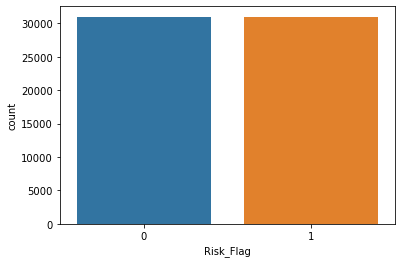

In [62]:
sb.countplot(x=data["Risk_Flag"])

In [63]:
majority_indices = data[data["Risk_Flag"]==0].index
minority_count = data[data["Risk_Flag"]==1].shape[0]

downsample_indices = np.random.choice(majority_indices, size=minority_count, replace=False)

positive_class_df = data[data["Risk_Flag"]==1]
negative_class_df = data.loc[downsample_indices]
balanced_df = pd.concat([positive_class_df, negative_class_df], axis=0)
balanced_df = balanced_df.sample(frac=1)
balanced_df = balanced_df.reset_index(drop=True)

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

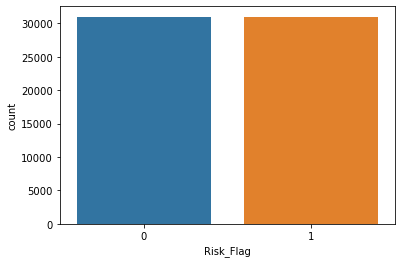

In [64]:
sb.countplot(x=balanced_df["Risk_Flag"])

In [65]:
data = balanced_df.copy(deep=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61992 entries, 0 to 61991
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 61992 non-null  int64 
 1   Income             61992 non-null  int64 
 2   Age                61992 non-null  int64 
 3   Experience         61992 non-null  int64 
 4   Married/Single     61992 non-null  object
 5   House_Ownership    61992 non-null  object
 6   Car_Ownership      61992 non-null  object
 7   Profession         61992 non-null  object
 8   CITY               61992 non-null  object
 9   STATE              61992 non-null  object
 10  CURRENT_JOB_YRS    61992 non-null  int64 
 11  CURRENT_HOUSE_YRS  61992 non-null  int64 
 12  Risk_Flag          61992 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 6.1+ MB


Se reduce el dataset a 61992 registros

## Verificar y limpiar de datos
Se trata de encontrar las variables con datos faltantes

In [67]:
# encontrar las variables con datos faltantes
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

[]

In [68]:
df_missing = data.isna().sum()
print(df_missing[df_missing > 0])

Series([], dtype: int64)


## LabelEncoder

In [69]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
data['Married/Single'] = LabelEncoder.fit_transform(data['Married/Single'])
data['House_Ownership'] = LabelEncoder.fit_transform(data['House_Ownership'])
data['Car_Ownership'] = LabelEncoder.fit_transform(data['Car_Ownership'])
data['Profession'] = LabelEncoder.fit_transform(data['Profession'])
data['CITY'] = LabelEncoder.fit_transform(data['CITY'])
data['STATE'] = LabelEncoder.fit_transform(data['STATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61992 entries, 0 to 61991
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 61992 non-null  int64
 1   Income             61992 non-null  int64
 2   Age                61992 non-null  int64
 3   Experience         61992 non-null  int64
 4   Married/Single     61992 non-null  int32
 5   House_Ownership    61992 non-null  int32
 6   Car_Ownership      61992 non-null  int32
 7   Profession         61992 non-null  int32
 8   CITY               61992 non-null  int32
 9   STATE              61992 non-null  int32
 10  CURRENT_JOB_YRS    61992 non-null  int64
 11  CURRENT_HOUSE_YRS  61992 non-null  int64
 12  Risk_Flag          61992 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 4.7 MB


## Hallar X, Y

In [70]:
X = data.iloc[:,1:12]
y = data.iloc[:,-1]

## Dividir el dataset en training and testing 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.describe()


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,4.339400e+04,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000,43394.000000
mean,4.983500e+06,49.519058,9.859842,0.904203,1.900240,0.290224,25.254436,157.856432,13.776559,6.276121,11.981841
std,2.896084e+06,17.163054,6.044038,0.294316,0.379915,0.453871,14.836372,92.373235,9.356974,3.697531,1.398744
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,2.453220e+06,34.000000,5.000000,1.000000,2.000000,0.000000,12.000000,77.000000,6.000000,3.000000,11.000000
50%,4.995211e+06,49.000000,10.000000,1.000000,2.000000,0.000000,26.000000,156.000000,13.000000,6.000000,12.000000
75%,7.512179e+06,64.000000,15.000000,1.000000,2.000000,1.000000,38.000000,239.000000,22.000000,9.000000,13.000000
max,9.999180e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000


## Normalización media con Scikit-learn: solución alternativa

In [72]:

# configurar el StandardScaler para que elimine la media
# pero que no divida por la desviación estándar
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# configurar el robustscaler para que NO elimine la mediana
# sino que normalice por max()-min(), es importante para esto configurar el
# rango de cuantiles a 0 y 100, que representan los valores mínimo y máximo
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# ajustar los escaladores al conjunto de train, aprenderá los parámetros
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))


In [73]:

# transformemos los arrays NumPy devueltos en dataframes para el resto de la demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [74]:
#Descripción de los datos antes de la Normalización 
np.round(X_train.describe(), 1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0
mean,4983500.1,49.5,9.9,0.9,1.9,0.3,25.3,157.9,13.8,6.3,12.0
std,2896083.8,17.2,6.0,0.3,0.4,0.5,14.8,92.4,9.4,3.7,1.4
min,10310.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
25%,2453220.0,34.0,5.0,1.0,2.0,0.0,12.0,77.0,6.0,3.0,11.0
50%,4995211.0,49.0,10.0,1.0,2.0,0.0,26.0,156.0,13.0,6.0,12.0
75%,7512179.0,64.0,15.0,1.0,2.0,1.0,38.0,239.0,22.0,9.0,13.0
max,9999180.0,79.0,20.0,1.0,2.0,1.0,50.0,316.0,28.0,14.0,14.0


In [75]:
#Descripción de los datos despues de la Normalización
np.round(X_train_scaled.describe(), 1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0,43394.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,0.3,0.3,0.3,0.3,0.2,0.5,0.3,0.3,0.3,0.3,0.3
min,-0.5,-0.5,-0.5,-0.9,-1.0,-0.3,-0.5,-0.5,-0.5,-0.4,-0.5
25%,-0.3,-0.3,-0.2,0.1,0.0,-0.3,-0.3,-0.3,-0.3,-0.2,-0.2
50%,0.0,-0.0,0.0,0.1,0.0,-0.3,0.0,-0.0,-0.0,-0.0,0.0
75%,0.3,0.2,0.3,0.1,0.0,0.7,0.3,0.3,0.3,0.2,0.3
max,0.5,0.5,0.5,0.1,0.0,0.7,0.5,0.5,0.5,0.6,0.5


In [76]:
np.round(X_test_scaled.describe(), 1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0,18598.0
mean,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,0.3,0.3,0.3,0.3,0.2,0.5,0.3,0.3,0.3,0.3,0.3
min,-0.5,-0.5,-0.5,-0.9,-1.0,-0.3,-0.5,-0.5,-0.5,-0.4,-0.5
25%,-0.3,-0.3,-0.2,0.1,0.0,-0.3,-0.3,-0.2,-0.3,-0.2,-0.2
50%,-0.0,-0.0,0.0,0.1,0.0,-0.3,-0.0,0.0,-0.0,-0.0,0.0
75%,0.3,0.3,0.3,0.1,0.0,0.7,0.3,0.3,0.3,0.2,0.3
max,0.5,0.5,0.5,0.1,0.0,0.7,0.5,0.5,0.5,0.6,0.5


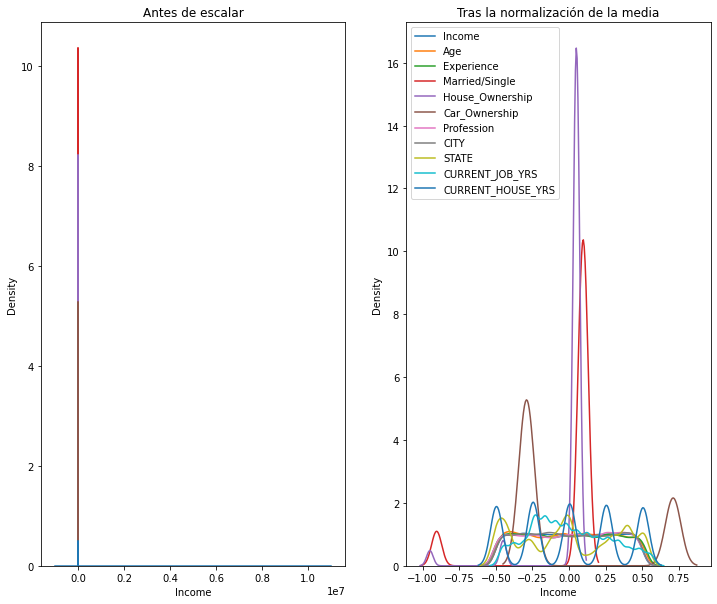

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

# before scaling
ax1.set_title('Antes de escalar')
sns.kdeplot(X_train['Income'], ax=ax1)
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Experience'], ax=ax1)
sns.kdeplot(X_train['Married/Single'], ax=ax1)
sns.kdeplot(X_train['House_Ownership'], ax=ax1)
sns.kdeplot(X_train['Car_Ownership'], ax=ax1)
sns.kdeplot(X_train['Profession'], ax=ax1)
sns.kdeplot(X_train['CITY'], ax=ax1)
sns.kdeplot(X_train['STATE'], ax=ax1)
sns.kdeplot(X_train['CURRENT_JOB_YRS'], ax=ax1)
sns.kdeplot(X_train['CURRENT_HOUSE_YRS'], ax=ax1)
# after scaling
ax2.set_title('Tras la normalización de la media')
sns.kdeplot(X_train_scaled['Income'], ax=ax2)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Experience'], ax=ax2)
sns.kdeplot(X_train_scaled['Married/Single'], ax=ax2)
sns.kdeplot(X_train_scaled['House_Ownership'], ax=ax2)
sns.kdeplot(X_train_scaled['Car_Ownership'], ax=ax2)
sns.kdeplot(X_train_scaled['Profession'], ax=ax2)
sns.kdeplot(X_train_scaled['CITY'], ax=ax2)
sns.kdeplot(X_train_scaled['STATE'], ax=ax2)
sns.kdeplot(X_train_scaled['CURRENT_JOB_YRS'], ax=ax2)
sns.kdeplot(X_train_scaled['CURRENT_HOUSE_YRS'], ax=ax2)

plt.legend(labels=["Income", "Age", 'Experience', 'Married/Single', 'House_Ownership', 
                   "Car_Ownership", "Profession", 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'])
plt.show()

In [78]:
def Metricas(y_test, y_pred):
    print()
    print('Métricas de rendimiento')
    print()
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    
    
#Para crear la Matriz de confusión usando pd.crosstab la cual devuelve la tabla de contingencia 
# resultante de cruzar dos o más campos de un dataframe
def MatrizConfusion(y_test, y_pred):
    matrizConf = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(matrizConf, annot=True)
    print()
    print('Matriz de confusión')
    print()
    plt.show()
    print()
    print()
    print(matrizConf)

## Red Neuronal Perceptron Multicapas

In [26]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(55,55,55), max_iter= 1000, alpha=0.000001,
                 solver='adam', random_state=22, tol = 0.00000001)

In [27]:
mlp.fit(X_train_scaled, y_train)
predictions=mlp.predict(X_test_scaled)
accuracyRN = metrics.accuracy_score(y_test, predictions)

In [28]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      9318
           1       0.80      0.85      0.83      9280

    accuracy                           0.82     18598
   macro avg       0.82      0.82      0.82     18598
weighted avg       0.82      0.82      0.82     18598



In [29]:
Metricas(y_test, predictions)


Métricas de rendimiento

Accuracy: 0.8222389504247769
Precision: 0.8031871701177425
Recall: 0.8526939655172414



Matriz de confusión



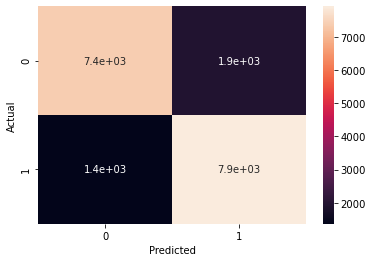



Predicted     0     1
Actual               
0          7379  1939
1          1367  7913


In [30]:
MatrizConfusion(y_test, predictions)

## DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", splitter= "random", max_depth=None)
dt.fit(X_train_scaled,y_train)
pred = dt.predict(X_test_scaled)

accuracyDT = metrics.accuracy_score(y_test, pred)

In [44]:
Metricas(y_test, pred)


Métricas de rendimiento

Accuracy: 0.8573502527153457
Precision: 0.8459129345443157
Recall: 0.8731681034482759


In [45]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      9318
           1       0.85      0.87      0.86      9280

    accuracy                           0.86     18598
   macro avg       0.86      0.86      0.86     18598
weighted avg       0.86      0.86      0.86     18598




Matriz de confusión



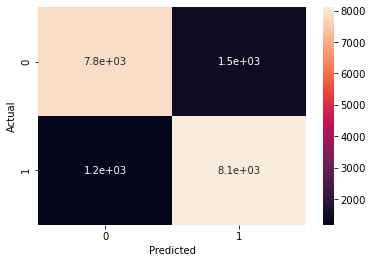



Predicted     0     1
Actual               
0          7842  1476
1          1177  8103


In [46]:
MatrizConfusion(y_test, pred)

## LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(penalty='l2', solver= 'liblinear', max_iter=1000, class_weight='balanced', random_state=42)
modelo.fit(X = X_train_scaled, y = y_train)
pred=modelo.predict(X_test_scaled)
accuracyLR = modelo.score(X_test_scaled, y_test)



In [36]:
Metricas(y_test, pred)


Métricas de rendimiento

Accuracy: 0.5387676094203678
Precision: 0.5355047541978556
Recall: 0.5704741379310345


In [37]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      9318
           1       0.54      0.57      0.55      9280

    accuracy                           0.54     18598
   macro avg       0.54      0.54      0.54     18598
weighted avg       0.54      0.54      0.54     18598




Matriz de confusión



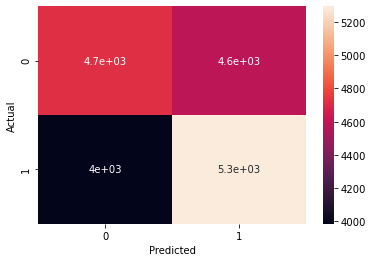



Predicted     0     1
Actual               
0          4726  4592
1          3986  5294


In [38]:
MatrizConfusion(y_test, pred)

# Comparacion de los Modelos

In [40]:
print("Accuracy")
print("NeuronalNetwork:", accuracyRN)
print("decisionTreeClassifier",accuracyDT)
print("LogisticRegression", accuracyLR)




Accuracy
NeuronalNetwork: 0.8222389504247769
decisionTreeClassifier 0.8604150983976772
LogisticRegression 0.5387676094203678


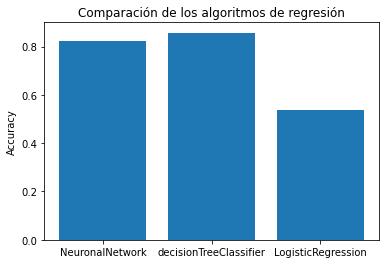

In [81]:
plt.figure(figsize=(6,4))
y = np.array([accuracyRN,accuracyDT,accuracyLR])
x = ["NeuronalNetwork","decisionTreeClassifier","LogisticRegression"]
plt.bar(x,y)
plt.title("Comparación de los algoritmos de regresión")
plt.ylabel("Accuracy")
plt.show()